# Machine Learning Foundation

## Section 2, Part d:  Regularization and Gradient Descent

## Introduction

We will begin with a short tutorial on regression, polynomial features, and regularization based on a very simple, sparse data set that contains a column of `x` data and associated `y` noisy data. The data file is called `X_Y_Sinusoid_Data.csv`. 

## Question 1

* Import the data. 

* Also generate approximately 100 equally spaced x data points over the range of 0 to 1. Using these points, calculate the y-data which represents the "ground truth" (the real function) from the equation: $y = sin(2\pi x)$

* Plot the sparse data (`x` vs `y`) and the calculated ("real") data.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

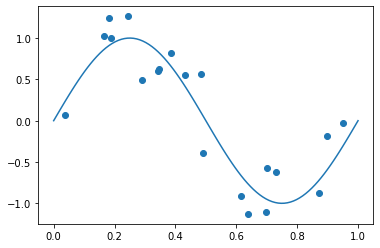

In [2]:
df = pd.read_csv("X_Y_Sinusoid_Data.csv")
df.head()

x_true = np.linspace(0,1,100)
y_true = np.sin(2*np.pi * x_true)

plt.scatter(df.x,df.y)
plt.plot(x_true,y_true)
plt.show()

## Question 2


* Using the `PolynomialFeatures` class from Scikit-learn's preprocessing library, create 20th order polynomial features.
* Fit this data using linear regression. 
* Plot the resulting predicted value compared to the calculated data.

Note that `PolynomialFeatures` requires either a dataframe (with one column, not a Series) or a 2D array of dimension (`X`, 1), where `X` is the length.

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_predict

In [4]:
pol = PolynomialFeatures(20, include_bias=False)
lr = LinearRegression()
model_est = Pipeline([("pol",pol),("regres",lr)])

In [5]:
x_train = df.x.to_frame()
y_train = df.y
x_true_df = pd.DataFrame(x_true, columns=["x"])

In [6]:
model_est.fit(x_train,y_train)

Pipeline(steps=[('pol', PolynomialFeatures(degree=20, include_bias=False)),
                ('regres', LinearRegression())])

(-2.0, 2.0)

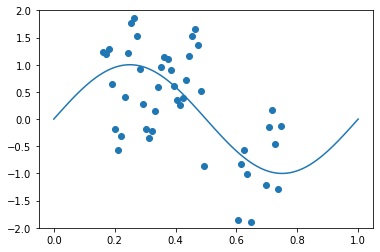

In [7]:
y_pred = model_est.predict(x_true_df)
plt.scatter(x_true, y_pred)
plt.plot(x_true, y_true)
plt.ylim(-2,2)

In [8]:
y_pred

array([-2.31931736e+05, -1.09052516e+05, -4.39639263e+04, -1.21024464e+04,
        1.60238128e+03,  6.06326375e+03,  6.30980358e+03,  5.00529223e+03,
        3.43183223e+03,  2.11019933e+03,  1.17481726e+03,  5.89250288e+02,
        2.61470996e+02,  9.89498912e+01,  2.97807750e+01,  6.32805492e+00,
        1.23045653e+00,  1.20224252e+00,  1.29741210e+00,  6.51994466e-01,
       -1.76342846e-01, -5.65986396e-01, -3.06951166e-01,  4.13605450e-01,
        1.21983862e+00,  1.76392937e+00,  1.86150813e+00,  1.52591538e+00,
        9.22844170e-01,  2.84054993e-01, -1.81381942e-01, -3.50538970e-01,
       -2.11539031e-01,  1.49493455e-01,  5.88677644e-01,  9.56036805e-01,
        1.14242673e+00,  1.10953259e+00,  8.96352051e-01,  6.02566956e-01,
        3.54687928e-01,  2.64775513e-01,  3.92796754e-01,  7.22218751e-01,
        1.15537000e+00,  1.53040051e+00,  1.65613294e+00,  1.35803723e+00,
        5.24480103e-01, -8.56379272e-01, -2.67992664e+00, -4.73229480e+00,
       -6.72289539e+00, -

## Question 3

* Perform the regression on using the data with polynomial features using ridge regression ($\alpha$=0.001) and lasso regression ($\alpha$=0.0001). 
* Plot the results, as was done in Question 1. 
* Also plot the magnitude of the coefficients obtained from these regressions, and compare them to those obtained from linear regression in the previous question. The linear regression coefficients will likely need a separate plot (or their own y-axis) due to their large magnitude. 

What does the comparatively large magnitude of the data tell you about the role of regularization?

In [9]:
from sklearn.linear_model import Lasso, Ridge

In [10]:
lasso = Lasso(alpha=0.0001,max_iter=100000)
ridge = Ridge(alpha=0.001,max_iter=100000)
model_est_lasso = Pipeline([("pol",pol),("regres",lasso)])
model_est_ridge = Pipeline([("pol",pol),("regres",ridge)])

In [11]:
model_est_lasso.fit(x_train,y_train,)
model_est_ridge.fit(x_train,y_train)

Pipeline(steps=[('pol', PolynomialFeatures(degree=20, include_bias=False)),
                ('regres', Ridge(alpha=0.001, max_iter=100000))])

In [12]:
y_pred_lasso = model_est_lasso.predict(x_true_df)
y_pred_ridge = model_est_lasso.predict(x_true_df)

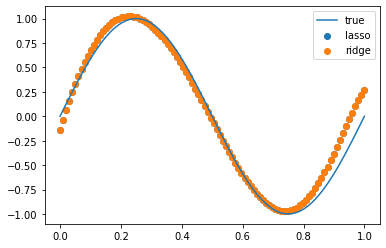

In [13]:
plt.scatter(x_true, y_pred_lasso, label="lasso")
plt.scatter(x_true, y_pred_ridge, label="ridge")
plt.plot(x_true, y_true, label="true")
plt.legend()

In [14]:
coef_lasso = model_est_lasso.named_steps["regres"].coef_
coef_ridge = model_est_ridge.named_steps["regres"].coef_

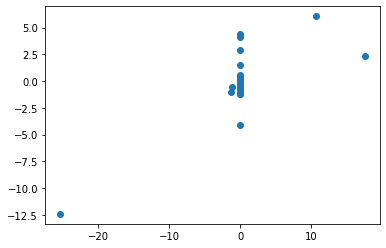

In [15]:
plt.scatter(coef_lasso, coef_ridge)

## Question 4

For the remaining questions, we will be working with the [data set](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) from last lesson, which is based on housing prices in Ames, Iowa. There are an extensive number of features--see the exercises from week three for a discussion of these features.

To begin:

* Import the data with Pandas, remove any null values, and one hot encode categoricals. Either Scikit-learn's feature encoders or Pandas `get_dummies` method can be used.
* Split the data into train and test sets. 
* Log transform skewed features. 
* Scaling can be attempted, although it can be interesting to see how well regularization works without scaling features.

In [16]:
from sklearn.model_selection import KFold, cross_val_predict

In [17]:
df = pd.read_csv("Ames_Housing_Sales.csv")
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0


In [18]:
cat_columns = list(df.dtypes[df.dtypes == np.object].index)

In [19]:
df_cat = pd.get_dummies(df,columns=cat_columns, drop_first=True)
y = df_cat.SalePrice
df_cat.drop(columns=["SalePrice"], inplace=True)

In [20]:
num_columns = list(df_cat.dtypes[df_cat.dtypes == np.number].index)
skew_serie = df_cat[num_columns].skew()
to_log_columns = list(skew_serie[skew_serie > 0.75].index)
df_cat.loc[:,to_log_columns] = df_cat[to_log_columns].apply(np.log1p)

In [21]:
from sklearn.model_selection import train_test_split


In [22]:
x_train, x_test, y_train, y_test = train_test_split(df_cat, y, test_size=0.3,random_state=3467)

Create a list of categorial data and one-hot encode. Pandas one-hot encoder (`get_dummies`) works well with data that is defined as a categorical.

Next, split the data in train and test data sets.

There are a number of columns that have skewed features--a log transformation can be applied to them. Note that this includes the `SalePrice`, our predictor. However, let's keep that one as is.

Transform all the columns where the skew is greater than 0.75, excluding "SalePrice".

Separate features from predictor.

## Question 5

* Write a function **`rmse`** that takes in truth and prediction values and returns the root-mean-squared error. Use sklearn's `mean_squared_error`.  


* Fit a basic linear regression model
* print the root-mean-squared error for this model
* plot the predicted vs actual sale price based on the model.  

In [23]:
from sklearn.metrics import mean_squared_error

def rmse(truth, pred):
        return np.sqrt(mean_squared_error(truth, pred))

In [24]:
lr = LinearRegression()

33834.09032134812


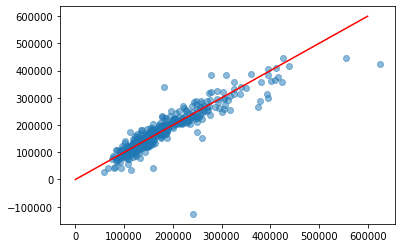

In [25]:
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
print(rmse(y_test,pred) )

plt.scatter(y_test, pred, alpha=0.5)
plt.plot(np.arange(0,600000),np.arange(0,600000), color="red")

In [26]:
y_test[pred < 0]

253    241500.0
Name: SalePrice, dtype: float64

## Question 6

Ridge regression uses L2 normalization to reduce the magnitude of the coefficients. This can be helpful in situations where there is high variance. The regularization functions in Scikit-learn each contain versions that have cross-validation built in.

* Fit a regular (non-cross validated) Ridge model to a range of $\alpha$ values and plot the RMSE using the cross validated error function you created above.
* Use $$[0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]$$ as the range of alphas.
* Then repeat the fitting of the Ridge models using the range of $\alpha$ values from the prior section. Compare the results.

Now for the `RidgeCV` method. It's not possible to get the alpha values for the models that weren't selected, unfortunately. The resulting error values and $\alpha$ values are very similar to those obtained above.

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.pipeline import Pipeline

In [28]:
alphas = np.array([0.005,0.05,0.1,0.3,1,2,3,10,15,30,80])

rmse_rigde = []

for alpha in alphas:
    est = Pipeline([#("scale",StandardScaler()),
                    ("reg", Ridge(alpha, max_iter=100000))])
    est.fit(x_train, y_train)
    rmse_val = rmse(y_test, est.predict(x_test))
    rmse_rigde.append(rmse_val)


In [30]:
df_vis = pd.DataFrame(zip(rmse_rigde,alphas), columns=["rmse","alpha"])

In [31]:
df_vis

,rmse,alpha
0,35251.324266,0.005
1,31522.665999,0.050
2,30396.473101,0.100
3,29204.372090,0.300
4,27970.402143,1.000
5,27113.635014,2.000
6,26576.012241,3.000
7,25211.805379,10.000
8,25025.644347,15.000
9,25272.704027,30.000


In [32]:
ridge_cv = RidgeCV(alphas=alphas,cv=3)

In [33]:
ridge_cv.fit(df_cat, y)

RidgeCV(alphas=array([5.0e-03, 5.0e-02, 1.0e-01, 3.0e-01, 1.0e+00, 2.0e+00, 3.0e+00,
       1.0e+01, 1.5e+01, 3.0e+01, 8.0e+01]),
        cv=3)

In [34]:
ridge_cv.alpha_

10.0

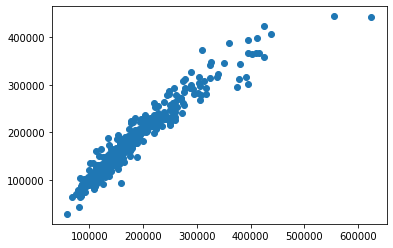

In [35]:
plt.scatter(y_test, ridge_cv.predict(x_test))

In [45]:
print(rmse(y_test, ridge_cv.predict(x_test)))

21731.40202199662


## Question 7


Much like the `RidgeCV` function, there is also a `LassoCV` function that uses an L1 regularization function and cross-validation. L1 regularization will selectively shrink some coefficients, effectively performing feature elimination.

The `LassoCV` function does not allow the scoring function to be set. However, the custom error function (`rmse`) created above can be used to evaluate the error on the final model.

Similarly, there is also an elastic net function with cross validation, `ElasticNetCV`, which is a combination of L2 and L1 regularization.

* Fit a Lasso model using cross validation and determine the optimum value for $\alpha$ and the RMSE using the function created above. Note that the magnitude of $\alpha$ may be different from the Ridge model.
* Repeat this with the Elastic net model.
* Compare the results via table and/or plot.

Use the following alphas:  
`[1e-5, 5e-5, 0.0001, 0.0005]`

In [39]:
las_alphas = np.array([1E-5,5E-5,1E-4,5E-4])
lasso_cv = LassoCV(alphas=las_alphas,cv=3, max_iter=100000)

In [40]:
lasso_cv.fit(df_cat, y)

/home/pan/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 206383007330.3529, tolerance: 584006899.0202674
  model = cd_fast.enet_coordinate_descent_gram(
/home/pan/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57265227389.98895, tolerance: 584006899.0202674
  model = cd_fast.enet_coordinate_descent_gram(
/home/pan/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57332612877.55444, tolerance: 584006899.0202674
  model = cd_fast.enet_coordinate_descent_gram(
/home/pan/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinat

LassoCV(alphas=array([1.e-05, 5.e-05, 1.e-04, 5.e-04]), cv=3, max_iter=100000)

In [41]:
lasso_cv.alpha_

1e-05

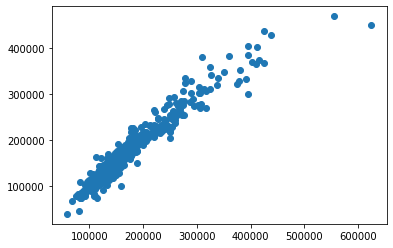

In [42]:
plt.scatter(y_test, lasso_cv.predict(x_test))

In [44]:
print(rmse(y_test,lasso_cv.predict(x_test)))

20650.59740996505


In [46]:
from sklearn.linear_model import ElasticNetCV

In [58]:
l1_ratios = [.1, .5, .7,.9, .95, .99]
el_alphas = np.geomspace(1E-5,100,10)
el_cv = ElasticNetCV(l1_ratio=l1_ratios,alphas=el_alphas, max_iter=100000)

In [59]:
el_cv.fit(df_cat, y)

/home/pan/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 287375334750.396, tolerance: 711042684.2390956
  model = cd_fast.enet_coordinate_descent_gram(
/home/pan/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 263257374474.95816, tolerance: 680204347.1544293
  model = cd_fast.enet_coordinate_descent_gram(
/home/pan/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 227635846021.90256, tolerance: 654659919.6197997
  model = cd_fast.enet_coordinate_descent_gram(
/home/pan/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordina

/home/pan/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 264496059469.79965, tolerance: 718055444.8266017
  model = cd_fast.enet_coordinate_descent_gram(
/home/pan/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58654873975.310455, tolerance: 677529122.5660479
  model = cd_fast.enet_coordinate_descent_gram(
/home/pan/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202235927182.5132, tolerance: 677529122.5660479
  model = cd_fast.enet_coordinate_descent_gram(
/home/pan/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordin

/home/pan/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48793662603.54071, tolerance: 677529122.5660479
  model = cd_fast.enet_coordinate_descent_gram(
/home/pan/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54385023221.63818, tolerance: 677529122.5660479
  model = cd_fast.enet_coordinate_descent_gram(


ElasticNetCV(alphas=array([1.00000000e-05, 5.99484250e-05, 3.59381366e-04, 2.15443469e-03,
       1.29154967e-02, 7.74263683e-02, 4.64158883e-01, 2.78255940e+00,
       1.66810054e+01, 1.00000000e+02]),
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99], max_iter=100000)

In [61]:
el_cv.l1_ratio_

0.9

In [62]:
print(rmse(y_test,el_cv.predict(x_test)))

21754.226309483507


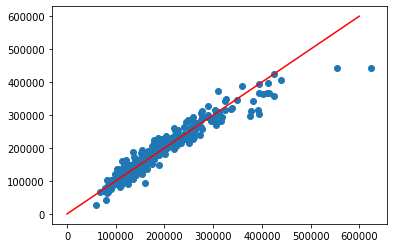

In [64]:
plt.scatter(y_test, el_cv.predict(x_test))
plt.plot(range(0,600000,10),range(0,600000,10), color="red")

We can determine how many of these features remain non-zero.

Now try the elastic net, with the same alphas as in Lasso, and l1_ratios between 0.1 and 0.9

Comparing the RMSE calculation from all models is easiest in a table.

We can also make a plot of actual vs predicted housing prices as before.

## Question 8

Let's explore Stochastic gradient descent in this exercise.  
Recall that Linear models in general are sensitive to scaling.
However, SGD is *very* sensitive to scaling.  
Moreover, a high value of learning rate can cause the algorithm to diverge, whereas a too low value may take too long to converge.

* Fit a stochastic gradient descent model without a regularization penalty (the relevant parameter is `penalty`).
* Now fit stochastic gradient descent models with each of the three penalties (L2, L1, Elastic Net) using the parameter values determined by cross validation above. 
* Do not scale the data before fitting the model.  
* Compare the results to those obtained without using stochastic gradient descent.

Notice how high the error values are! The algorithm is diverging. This can be due to scaling and/or learning rate being too high. Let's adjust the learning rate and see what happens.

* Pass in `eta0=1e-7` when creating the instance of `SGDClassifier`.
* Re-compute the errors for all the penalties and compare.

Now let's scale our training data and try again.

* Fit a `MinMaxScaler` to `X_train` create a variable `X_train_scaled`.
* Using the scaler, transform `X_test` and create a variable `X_test_scaled`. 
* Apply the same versions of SGD to them and compare the results. Don't pass in a eta0 this time.

---
### Machine Learning Foundation (C) 2020 IBM Corporation